In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as npr
import time

In [2]:
from MetropolisHastings import MetropolisHastings
from ConsensusMH import ConsensusMH
from FlyMH import FlyMH
from csMALA import csMALA

In [3]:
npr.seed(1)
N = 100000
dataType = "Gaussian"
#dataType = "logNormal"
if dataType == "Gaussian":
    x = npr.randn(N)
elif dataType == "logNormal":
    x = npr.lognormal(0,1, N)

# We store the mean and std deviation for later reference, they are also the MAP and MLE estimates in this case.
realMean = np.mean(x)
realStd = np.std(x)
print(f"Mean of x = {realMean}")
print(f"Std of x = {realStd}")
MAP = np.array([realMean, realStd])

Mean of x = 0.005253028489682668
Std of x = 0.9983292735417362
[ 1.62434536 -0.61175641 -0.52817175 ...  0.08122531  0.34404618
 -0.74755625]


In [4]:
def plt_samples(Samples):
    sns.jointplot(x=Samples[:,0],y=Samples[:,1])

In [5]:
def compute_autocorrelation(arr):
    n = len(arr)
    mean = np.mean(arr)
    autocorr = np.correlate(arr - mean, arr - mean, mode='full')
    autocorr = autocorr[n-1:] / autocorr[n-1]
    return autocorr


In [6]:
from scipy.stats import norm

def compute_bvm(data):
    n = len(data)
    mean = np.mean(data)
    std = np.std(data)
    se = std / np.sqrt(n)
    
    # Compute the Bernstein-Von Mises approximation
    bvm = norm(loc=mean, scale=se)
    
    return bvm


## VanillaMH

Execution time: 4.054185 seconds
[[0.00525303 0.99832927]
 [0.00525303 0.99832927]
 [0.00539033 0.99763202]
 ...
 [0.00298241 1.0002222 ]
 [0.00386007 0.99903342]
 [0.00481784 0.99847682]]


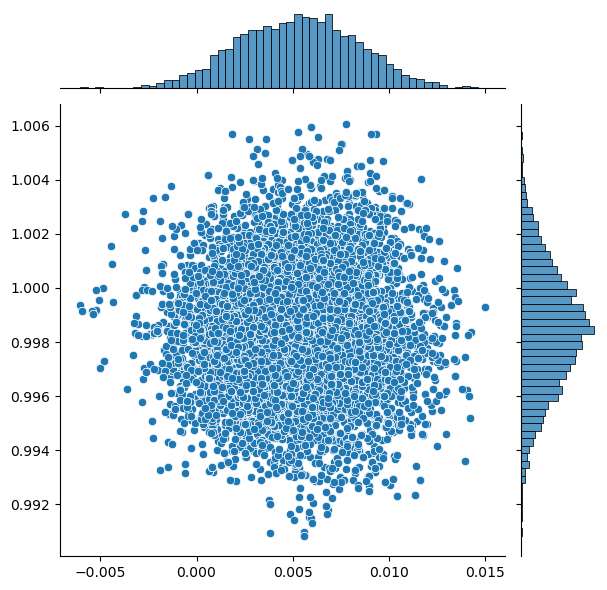

In [7]:
T = 10000
test_vanillMH = MetropolisHastings(x)

start_time = time.time()
test_vanillMH_run = test_vanillMH.run(T, MAP, x)
end_time = time.time()
ex_time_vanillaMH = end_time - start_time
print(f"Execution time: {ex_time_vanillaMH:.6f} seconds")
print(test_vanillMH_run)
plt_samples(test_vanillMH_run)

## ConsensusMH

Execution time: 5.990978 seconds


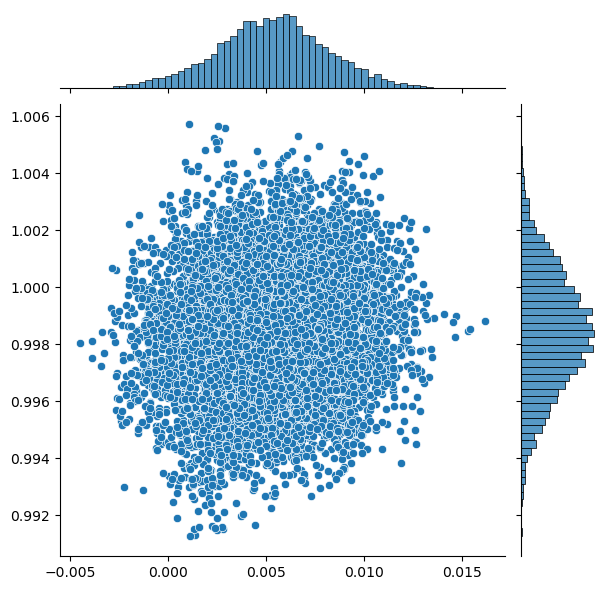

In [8]:
num_batches = 4
T = 10000

test_consMH = ConsensusMH(dataset = x, num_batches=num_batches)

start_time = time.time()
test_consMH_run = test_consMH.run(T, MAP)
end_time = time.time()
ex_time_ConsMH = end_time - start_time
print(f"Execution time: {ex_time_ConsMH:.6f} seconds")
plt_samples(test_consMH_run)

## FlyMH


In [9]:
# batch_percentage = 0.9
# T = 1000

# test_FlyMH = FlyMH(dataset = x, sample_fraction=batch_percentage)

# start_time = time.time()
# test_FlyMH_run = test_FlyMH.run(T, MAP)
# end_time = time.time()
# ex_time_FLYMH = end_time - start_time
# print(f"Execution time: {ex_time_FLYMH:.6f} seconds")
# plt_samples(test_FlyMH_run)

##MALA


Execution time: 45.094566 seconds


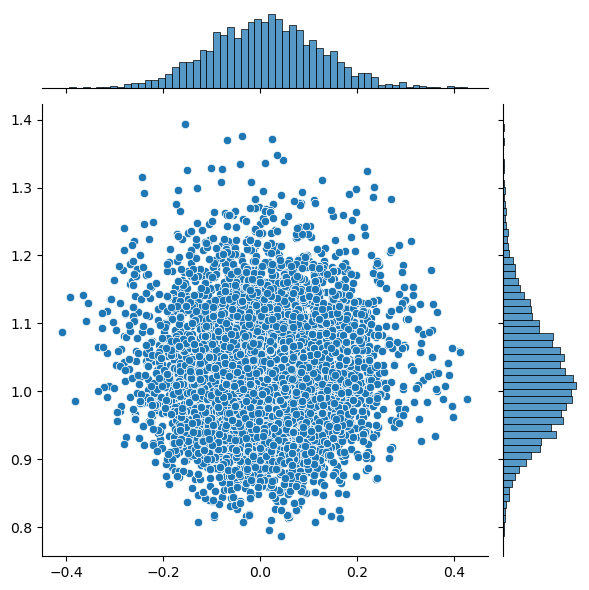

In [10]:
batch_percentage = 1
T = 10000

test_MALA = csMALA(dataset = x, batch_percentage=batch_percentage)
test_MALA.corr_param = 0

start_time = time.time()
test_MALA.run(T, MAP)
end_time = time.time()
ex_time_MALA = end_time - start_time
test_MALA_samples = test_MALA.S
print(f"Execution time: {ex_time_MALA:.6f} seconds")
plt_samples(test_MALA_samples)

## csMALA

In [11]:
batch_percentage = 0.1
T = 10000

test_csMALA = csMALA(dataset = x, batch_percentage=batch_percentage)

start_time = time.time()
test_csMALA.run(T, MAP)
end_time = time.time()
ex_time_csMALA = end_time - start_time
test_csMALA_samples = test_csMALA.S
print(f"Execution time: {ex_time_csMALA:.6f} seconds")
plt_samples(test_csMALA_samples)